In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [40]:
data = pd.read_csv("fake_bills.csv", sep=";")

data.fillna(data.mean(), inplace=True)
print("data", data)


# target = data.drop("is_genuine", axis=1)
target=data["is_genuine"]
data = data.drop("is_genuine", axis=1)
print("tar", target)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
# kernel="linear"
svm = SVC()
svm.fit(X_train, y_train)
out = svm.predict(X_test)
print(out)
print(svm.score(X_train, y_train)*100 ,"%")
print(accuracy_score(y_test, out)*100, "%")

data       is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1   

<Axes: >

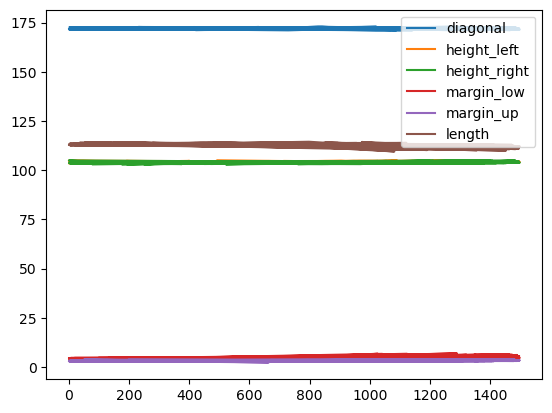

In [41]:
X_train.plot()

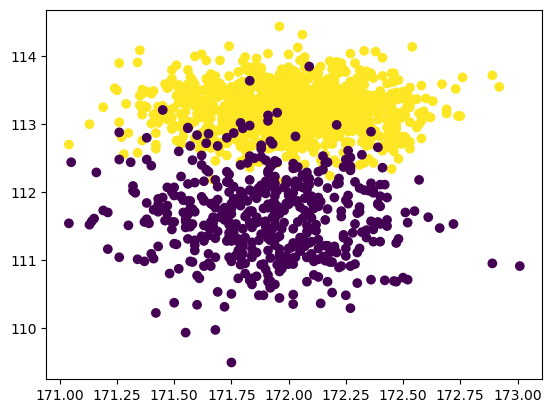

In [42]:
plt.scatter(data['diagonal'], data['length'], c=target)
plt.show()

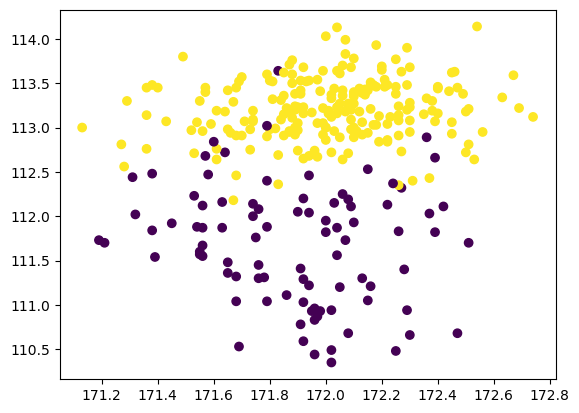

In [43]:
plt.scatter(X_test['diagonal'], X_test['length'], c=y_test)

In [44]:
# to reduce number of columns/dimensions/parameters, to make it easier to plot and understand
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(data)

transform = pca.transform(data)

In [45]:
df = pd.DataFrame(transform, columns=["PCA1", "PCA2"])
print(df)

          PCA1      PCA2
0     0.111453  0.214379
1    -0.831860 -0.376998
2    -0.504246  0.158539
3    -1.146515 -0.229259
4    -0.117409 -0.463968
...        ...       ...
1495  1.179897 -0.794505
1496  1.973199 -0.263125
1497  1.199321  0.456600
1498  0.797324  0.333737
1499  0.615342 -0.205401

[1500 rows x 2 columns]


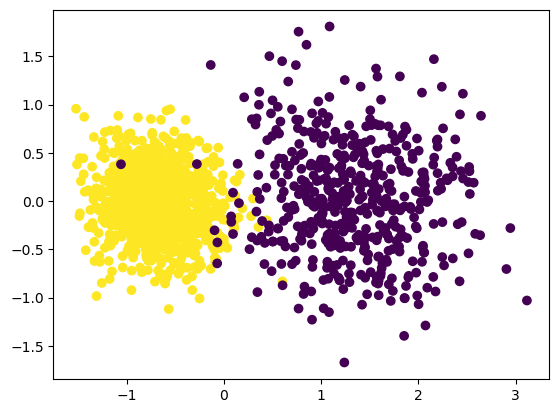

In [47]:
plt.scatter(df["PCA1"], df["PCA2"], c=target)
plt.show()